# Hola Yair! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>


## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Buen trabajo! Tu notebook está casi completo, solamente hay un par de errores a corregir en la caracterización de restoranes de cadenas y hacia el final en el conteo de calles con un solo restaurant. Lee los comentarios indicados y realiza los cambios necesarios.
    
Saludos!
</div>

## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Bien hecho! Has completado correctamente todas las partes del notebook. Está aprobado.
    
Saludos!
</div>

----

## Paso 1. Descarga los datos y prepáralos para el análisis

In [1]:
#importar todas las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
#leer el archivo
data=pd.read_csv('/datasets/rest_data_us.csv')

In [3]:
#eliminar filas nulas
data.info()
data.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


## Paso 2. Análisis de datos

### Investiga las proporciones de los distintos tipos de establecimientos. Traza un gráfico.

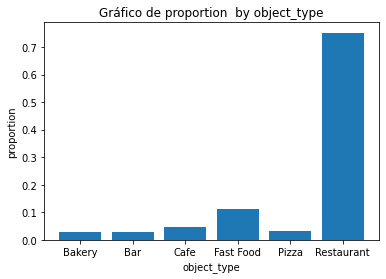

In [4]:
#buscar el total de establecimientos
total_type=len(data['object_type'])
#agrupar por tipo de establecimiento
group_type=data.groupby('object_type').count()
proportion_type=group_type['id']/total_type
proportion_type=proportion_type.reset_index()
plt.bar(proportion_type['object_type'],proportion_type['id'])
plt.xlabel('object_type')
plt.ylabel('proportion')
plt.title('Gráfico de proportion  by object_type')
plt.show()


mediante el grafico se observa claramente un predominio grande de la cantidad de restaurants con respecto a los demas tipos de establecimiento


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto
</div>

### Investiga las proporciones de los establecimientos que pertenecen a una cadena y de los que no. Traza un gráfico.

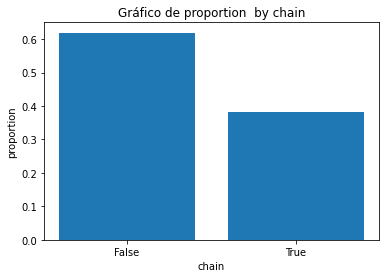

In [5]:
chain=data.groupby('chain').count()
chain_names = data['chain'].unique()
proportion_chain=chain['id']/total_type
proportion_chain=proportion_chain.reset_index()
plt.bar(proportion_chain['chain'],proportion_chain['id'])
plt.xlabel('chain')
plt.ylabel('proportion')
plt.title('Gráfico de proportion  by chain')
plt.xticks(proportion_chain['chain'], chain_names)
plt.show()


hay una leve mayoria de establecimientos que no pertenecen a una cadena con respecto a los que si pertenecen a una cadena 


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto
</div>

### ¿Qué tipo de establecimiento es habitualmente una cadena?

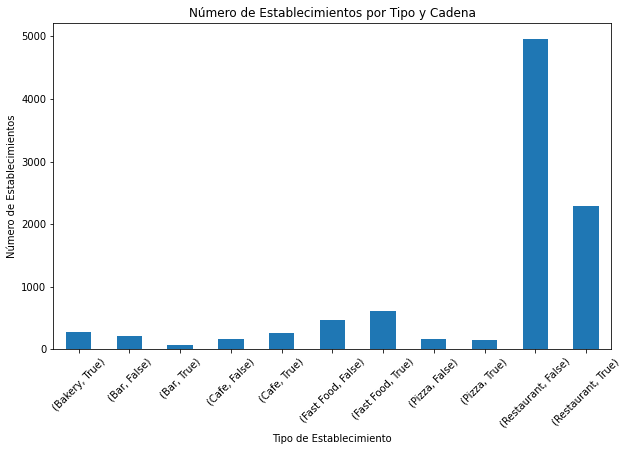

In [6]:
count_object_chain=data.groupby(['object_type','chain'])['id'].count()
# Graficar los resultados
count_object_chain.plot(kind='bar', stacked=True, figsize=(10, 6))

# Agregar etiquetas y título
plt.xlabel('Tipo de Establecimiento')
plt.ylabel('Número de Establecimientos')
plt.title('Número de Establecimientos por Tipo y Cadena')

plt.xticks(rotation='45')
# Mostrar el gráfico
plt.show()

los tipos de establecimiento habitulamente que son cadena son bakery , cafe y  fast food


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ok, está bien, sin embargo el gráfico podría mostrar de mejor forma las proporciones, por ejemplo podrías indicar la cantidad o el porcentaje de cada tipo de local.
</div>

### ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?

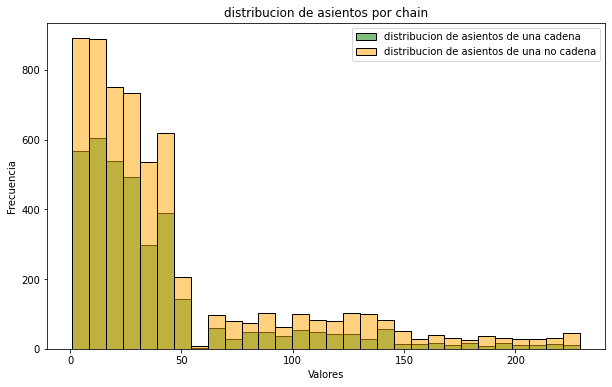

In [7]:
#dataframe con cadenas y no cadenas
data_chain=data[data['chain']==True]['number']
data_nochain=data[data['chain']==False]['number']
#crear histograma
plt.figure(figsize=(10, 6))
sns.histplot(data_chain, bins=30, color='green', alpha=0.5, label='distribucion de asientos de una cadena')
sns.histplot(data_nochain, bins=30, color='orange', alpha=0.5, label='distribucion de asientos de una no cadena')

# Añade etiquetas y leyenda
plt.title('distribucion de asientos por chain')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()

# Muestra el gráfico
plt.show()

en general la distribucion de asientos se concentra en menos de 50 asientos y lo que caracteriza a las cadenas es tener menos asientos que los establecimientos que no son cadenas, talves queriendo compensar su limitado alcance con mas asientos


<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

En esta parte podrías mostrar la distribución de asientos de las cadenas vs la distribución de asientos de las no cadenas. La tabla que muestras arriba no responde a la pregunta, ya que no tienes visibilidad de todos los establecimientos.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

OK, sin embargo, me parece que las distribuciones son similares no? Tanto para los restaurantes cadenas como no cadenas tenemos que la distribución está cargada hacia menos de 50 asientos. En todo caso es cierto que las cadenas se concentran en menos de 50 asientos.
</div>

### Determina el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos? Traza gráficos.

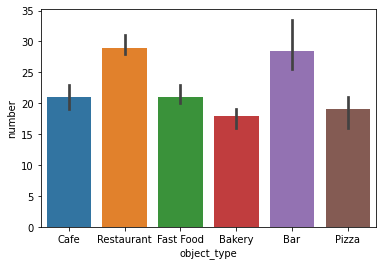

In [8]:

ax = sns.barplot(x='object_type', y='number', data=data,estimator=np.median) 

el tipo de restaurant y bar son significativamente estadisticamente iguales porque tienen over laping en las barras negras y son los tipos de restaurante con mas asientos en promedio


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

OK, correcto.
</div>

### Coloca los datos de los nombres de las calles de la columna address en una columna separada.

In [9]:
def limpiar_nombre_calle(nombre):
    # Eliminar números y caracteres especiales al final del nombre de la calle
    nombre_limpio = re.sub(r'\s*#\s*\S+$', '', nombre)
    # Eliminar números y caracteres especiales al principio del nombre de la calle
    nombre_limpio = re.sub(r'^\S+\s*#\s*', '', nombre_limpio)
    # Eliminar dobles espacios
    nombre_limpio = re.sub(r'\s+', ' ', nombre_limpio)
    return nombre_limpio.strip()
data['street_name_limpio'] = data['address'].apply(limpiar_nombre_calle)

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto.
</div>

### Traza un gráfico de las diez mejores calles por número de restaurantes.

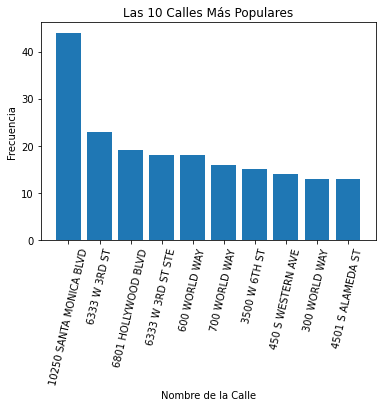

,street_name_limpio,id,object_name,address,chain,object_type,number
0,10250 SANTA MONICA BLVD,44,44,44,44,44,44
1,6333 W 3RD ST,23,23,23,23,23,23
2,6801 HOLLYWOOD BLVD,19,19,19,19,19,19
3,6333 W 3RD ST STE,18,18,18,18,18,18
4,600 WORLD WAY,18,18,18,18,18,18
5,700 WORLD WAY,16,16,16,16,16,16
6,3500 W 6TH ST,15,15,15,15,15,15
7,450 S WESTERN AVE,14,14,14,14,14,14
8,300 WORLD WAY,13,13,13,13,13,13
9,4501 S ALAMEDA ST,13,13,13,13,13,13


In [10]:
best_stret= data.groupby('street_name_limpio').count().sort_values(by='number',ascending=False).head(10).reset_index()
plt.bar(best_stret['street_name_limpio'],best_stret['number'])
plt.xlabel('Nombre de la Calle')
plt.ylabel('Frecuencia')
plt.title('Las 10 Calles Más Populares')
plt.xticks(rotation='77')
plt.show()
best_stret


la calle 10250 SANTA MONICA BLVD es donde se encuentran mas establecimientos con 44 establecimientos

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto.
</div>

### Encuentra el número de calles que solo tienen un restaurante.

In [11]:
data_rest=data[data['object_type']=='Restaurant']
calle_uno=[]
for calle in data_rest['street_name_limpio'].unique():
    rest_en_calle=data_rest[data_rest['street_name_limpio']==calle]
    if len(rest_en_calle) == 1:
        calle_uno.append(calle)
numero_calles_un_restaurante = len(calle_uno)
print(f"Número de calles con un restaurante: {numero_calles_un_restaurante}")


Número de calles con un restaurante: 5178


hay 5178 calles con un solo 

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Esto no cuenta las calles que solo tienen un restaurante, solamente cuenta cuántas calles distintas hay para el tipo restaurant. Para mostrar lo solicitado, agrupa por calle y cuenta los restaurantes, luego muestra solamente aquellos que devuelven valor 1 en el conteo.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Muy bien, correcto.
</div>

### Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?

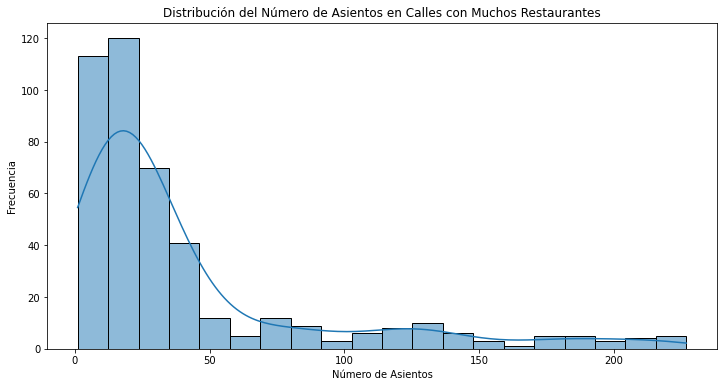

In [12]:
#calles con muchos restaurantes mayor a 2
calles_con_restaurant3 = data[data['object_type'] == 'Restaurant']

calles_con_muchos_restaurantes = calles_con_restaurant3['street_name_limpio'].value_counts().index[calles_con_restaurant3['street_name_limpio'].value_counts() > 5]
#filtro para las calles con muchos restaurantes
data_muchos_restaurantes = data[data['street_name_limpio'].isin(calles_con_muchos_restaurantes)]

# Grafica la distribución del número de asientos para las calles con muchos restaurantes
plt.figure(figsize=(12, 6))
sns.histplot(data=data_muchos_restaurantes, x='number', bins=20, kde=True)
plt.title('Distribución del Número de Asientos en Calles con Muchos Restaurantes')
plt.xlabel('Número de Asientos')
plt.ylabel('Frecuencia')
plt.show()

para las calles con muchos restaurantes se ve la tendencia de que el numero de sillas es menor a 25 graficamente se ve como una distribucion no normal con una cola extendida con una proyeccion hacia la derecha

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien! Correcto
</div>

segun el reporte lo que se debe realizar en una cadena de comida es primero considerar el numero de asientos que no deben superar los 25 , los habituales tipos de establcimiento al momento de hacer cadena son bakery , fast food y cafe por lo que al momento de considerar ese punto podria ser oportuno sugerir algun tipo de establcimiento diferente como bar o pizza 

In [14]:
data

,id,object_name,address,chain,object_type,number,street_name_limpio
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,3708 N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,100 WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,6801 HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,1814 W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,2100 ECHO PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,217 W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,5750 MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,6741 HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,548 S SPRING ST STE 100
